In [1]:
import os
import glob
import pandas as pd
from tqdm import tqdm
import pickle

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Define paths to the folders
hosp_path = "../mimic-iv-3.1/hosp/*.csv.gz"
icu_path = "../mimic-iv-3.1/icu/*.csv.gz"

# Get list of all csv.gz files
hosp_files = glob.glob(hosp_path)
icu_files = glob.glob(icu_path)

# Combine all file paths
all_files = hosp_files + icu_files
for file in all_files:
    print(file)


../mimic-iv-3.1/hosp\admissions.csv.gz
../mimic-iv-3.1/hosp\diagnoses_icd.csv.gz
../mimic-iv-3.1/hosp\drgcodes.csv.gz
../mimic-iv-3.1/hosp\d_hcpcs.csv.gz
../mimic-iv-3.1/hosp\d_icd_diagnoses.csv.gz
../mimic-iv-3.1/hosp\d_icd_procedures.csv.gz
../mimic-iv-3.1/hosp\d_labitems.csv.gz
../mimic-iv-3.1/hosp\emar.csv.gz
../mimic-iv-3.1/hosp\emar_detail.csv.gz
../mimic-iv-3.1/hosp\hcpcsevents.csv.gz
../mimic-iv-3.1/hosp\labevents.csv.gz
../mimic-iv-3.1/hosp\microbiologyevents.csv.gz
../mimic-iv-3.1/hosp\omr.csv.gz
../mimic-iv-3.1/hosp\patients.csv.gz
../mimic-iv-3.1/hosp\pharmacy.csv.gz
../mimic-iv-3.1/hosp\poe.csv.gz
../mimic-iv-3.1/hosp\poe_detail.csv.gz
../mimic-iv-3.1/hosp\prescriptions.csv.gz
../mimic-iv-3.1/hosp\procedures_icd.csv.gz
../mimic-iv-3.1/hosp\provider.csv.gz
../mimic-iv-3.1/hosp\services.csv.gz
../mimic-iv-3.1/hosp\transfers.csv.gz
../mimic-iv-3.1/icu\caregiver.csv.gz
../mimic-iv-3.1/icu\chartevents.csv.gz
../mimic-iv-3.1/icu\datetimeevents.csv.gz
../mimic-iv-3.1/icu\d_items.

### Import

In [2]:
# Import
targets = pd.read_pickle("../mimic-iv-3.1/final_microbiology_df.pkl")
labevents_df= pd.read_csv("../mimic-iv-3.1/labevents_df_4b_wd.csv.gz", compression="gzip")
# subject_hadm_driver = pd.read_pickle("../mimic-iv-3.1/subject_hadm_driver.pkl")
# subject_hadm_time_driver = pd.read_pickle("../mimic-iv-3.1/subject_hadm_time_driver.pkl")

# Labevents

### Read File and Filter

In [4]:
file_name = '../mimic-iv-3.1/hosp/labevents.csv.gz'
labevents_df = pd.read_csv(file_name, compression="gzip")
labevents_df

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
0,1,10000032,NaN,2704548,50931,P69FQC,2180-03-23 11:51:00,2180-03-23 15:56:00,___,95.00,mg/dL,70.0,100.0,NaN,ROUTINE,"IF FASTING, 70-100 NORMAL, >125 PROVISIONAL DI..."
1,2,10000032,NaN,36092842,51071,P69FQC,2180-03-23 11:51:00,2180-03-23 16:00:00,NEG,NaN,NaN,NaN,NaN,NaN,ROUTINE,NaN
2,3,10000032,NaN,36092842,51074,P69FQC,2180-03-23 11:51:00,2180-03-23 16:00:00,NEG,NaN,NaN,NaN,NaN,NaN,ROUTINE,NaN
3,4,10000032,NaN,36092842,51075,P69FQC,2180-03-23 11:51:00,2180-03-23 16:00:00,NEG,NaN,NaN,NaN,NaN,NaN,ROUTINE,BENZODIAZEPINE IMMUNOASSAY SCREEN DOES NOT DET...
4,5,10000032,NaN,36092842,51079,P69FQC,2180-03-23 11:51:00,2180-03-23 16:00:00,NEG,NaN,NaN,NaN,NaN,NaN,ROUTINE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158374759,159057534,19999987,23865745.0,59879875,51279,NaN,2145-11-09 05:30:00,2145-11-09 07:06:00,3.52,3.52,m/uL,4.2,5.4,abnormal,ROUTINE,NaN
158374760,159057535,19999987,23865745.0,59879875,51301,NaN,2145-11-09 05:30:00,2145-11-09 07:06:00,5.7,5.70,K/uL,4.0,11.0,NaN,ROUTINE,NaN
158374761,159057536,19999987,NaN,74914384,50912,P95A45,2146-02-07 11:13:00,2146-02-07 16:26:00,1.1,1.10,mg/dL,0.4,1.1,NaN,ROUTINE,NaN
158374762,159057537,19999987,NaN,74914384,50920,P95A45,2146-02-07 11:13:00,2146-02-07 16:26:00,NaN,NaN,NaN,NaN,NaN,NaN,ROUTINE,"Using this patient's age, gender, and serum cr..."


In [5]:
# Set index for faster lookups
labevents_df = labevents_df.set_index(['subject_id', 'hadm_id'])

In [6]:
# Filter only valid (subject_id, hadm_id) pairs
labevents_df = labevents_df.loc[
    labevents_df.index.intersection(subject_hadm_driver.set_index(['subject_id', 'hadm_id']).index)
].reset_index()

In [7]:
labevents_df.shape

(27725252, 16)

In [8]:
# Export
labevents_df.to_pickle("../mimic-iv-3.1/labevents_df_4b.pkl")

### Merge with description file

In [25]:
# Import
labevents_df = pd.read_pickle("../mimic-iv-3.1/labevents_df_4b.pkl")
labevents_df.shape

(27725252, 16)

In [26]:
file_name = '../mimic-iv-3.1/hosp/d_labitems.csv.gz'
labitems_description = pd.read_csv(file_name, compression="gzip")
labitems_description.head()

,itemid,label,fluid,category
0,50801,Alveolar-arterial Gradient,Blood,Blood Gas
1,50802,Base Excess,Blood,Blood Gas
2,50803,"Calculated Bicarbonate, Whole Blood",Blood,Blood Gas
3,50804,Calculated Total CO2,Blood,Blood Gas
4,50805,Carboxyhemoglobin,Blood,Blood Gas


In [27]:
# Set index for faster lookups
labevents_df = labevents_df.set_index('itemid')

# Set index for labitems_description and select only necessary columns
labitems_description = labitems_description.set_index('itemid')[['label', 'fluid', 'category']]

# Perform an index-based join to bring in additional columns
labevents_df = labevents_df.join(labitems_description, how='inner').reset_index()

# Check shape
labevents_df.shape

(27725252, 19)

In [28]:
labevents_df.head()

,itemid,subject_id,hadm_id,labevent_id,specimen_id,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments,label,fluid,category
0,51116,10000826,20032235.0,4288,56890274,NaN,2146-12-05 23:36:00,2146-12-06 01:37:00,53,53.0,%,0.0,0.0,abnormal,ROUTINE,NaN,Lymphocytes,Ascites,Hematology
1,51117,10000826,20032235.0,4289,56890274,NaN,2146-12-05 23:36:00,2146-12-06 01:37:00,___,30.0,%,0.0,0.0,abnormal,ROUTINE,___,Macrophage,Ascites,Hematology
2,51118,10000826,20032235.0,4290,56890274,NaN,2146-12-05 23:36:00,2146-12-06 01:37:00,1,1.0,%,0.0,0.0,abnormal,ROUTINE,NaN,Mesothelial Cell,Ascites,Hematology
3,51120,10000826,20032235.0,4291,56890274,NaN,2146-12-05 23:36:00,2146-12-06 01:37:00,6,6.0,%,0.0,0.0,abnormal,ROUTINE,NaN,Monocytes,Ascites,Hematology
4,51125,10000826,20032235.0,4292,56890274,NaN,2146-12-05 23:36:00,2146-12-06 01:37:00,10,10.0,%,0.0,0.0,abnormal,ROUTINE,NaN,Polys,Ascites,Hematology


In [29]:
# Export the reduced labevents file for faster loading and efficiency
labevents_df.to_pickle("../mimic-iv-3.1/labevents_df_4b_wd.pkl")
labevents_df.to_csv("../mimic-iv-3.1/labevents_df_4b_wd.csv.gz", compression="gzip", index=False)

### Initial EDA

In [34]:
grouped_counts = (
    labevents_df.groupby(['subject_id', 'hadm_id'])[['label', 'fluid']]
    .apply(lambda x: x.drop_duplicates().shape[0])  # Count distinct (label, fluid) pairs
    .reset_index(name='distinct_label_fluid_count')
)

# Sort by count
grouped_counts.sort_values(by='distinct_label_fluid_count', ascending=False, inplace=True)

# Display top 50
grouped_counts.head(50)

,subject_id,hadm_id,distinct_label_fluid_count
15814,19607507,24462799.0,263
8433,15208868,21444102.0,261
11621,17109434,28855911.0,258
16335,19893983,24540575.0,251
10141,16175244,29850931.0,249
11846,17254510,22078480.0,243
14160,18588165,28657057.0,241
10077,16133115,24673862.0,239
12550,17685938,24468195.0,236
13792,18393915,27867951.0,236


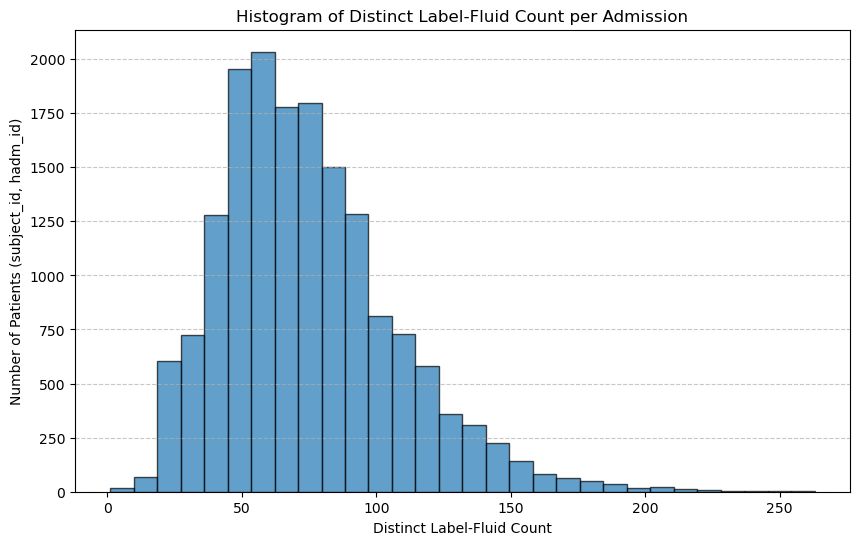

In [35]:
import matplotlib.pyplot as plt

# Extract distinct count values
counts = grouped_counts['distinct_label_fluid_count']

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Distinct Label-Fluid Count')
plt.ylabel('Number of Patients (subject_id, hadm_id)')
plt.title('Histogram of Distinct Label-Fluid Count per Admission')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [36]:
null_charttime_count = labevents_df['charttime'].isna().sum()
print(f"Number of null values in charttime: {null_charttime_count}")

Number of null values in charttime: 0


### Total subject occurences

In [3]:
# Reduce to a single test
# Find the earliest charttime per (subject_id, hadm_id)
earliest_charttime_idx = labevents_df.groupby(['subject_id', 'hadm_id','label','fluid'], dropna = False)['charttime'].idxmin()

# Filter down to only those rows
earliest_labevents_df = labevents_df.loc[earliest_charttime_idx]

earliest_labevents_df.shape

(3462246, 19)

In [4]:
# Count distinct subject_id and hadm_id per label, fluid, and category
distinct_counts = earliest_labevents_df.groupby(['label', 'fluid', 'category']).agg(
    distinct_subjects=('subject_id', 'nunique'),
    distinct_hadm_ids=('hadm_id', 'nunique'),
    total_occurrences=('subject_id', 'count')  # Optional: total number of occurrences
).reset_index()

# Sort by distinct hadm_id count (or distinct subject_id count)
distinct_counts.sort_values(by='distinct_subjects', ascending=False, inplace=True)
distinct_counts.head(100)

,label,fluid,category,distinct_subjects,distinct_hadm_ids,total_occurrences
433,Hematocrit,Blood,Hematology,31884,16378,39361
664,Platelet Count,Blood,Hematology,31881,16366,39351
546,MCV,Blood,Hematology,31877,16363,39347
725,Red Blood Cells,Blood,Hematology,31877,16363,39347
712,RDW,Blood,Hematology,31877,16363,39347
544,MCH,Blood,Hematology,31877,16363,39347
545,MCHC,Blood,Hematology,31877,16363,39347
893,White Blood Cells,Blood,Hematology,31868,16363,39338
291,Creatinine,Blood,Chemistry,31675,16321,39128
844,Urea Nitrogen,Blood,Chemistry,31628,16307,39071


In [5]:
# Select the top 100 most frequent "Fluid - Label" pairs
top_100_labs = distinct_counts.head(100)[["label", "fluid"]].values.tolist()
top_100_labs

[['Hematocrit', 'Blood'],
 ['Platelet Count', 'Blood'],
 ['MCV', 'Blood'],
 ['Red Blood Cells', 'Blood'],
 ['RDW', 'Blood'],
 ['MCH', 'Blood'],
 ['MCHC', 'Blood'],
 ['White Blood Cells', 'Blood'],
 ['Creatinine', 'Blood'],
 ['Urea Nitrogen', 'Blood'],
 ['Potassium', 'Blood'],
 ['Sodium', 'Blood'],
 ['Chloride', 'Blood'],
 ['Bicarbonate', 'Blood'],
 ['Anion Gap', 'Blood'],
 ['Hemoglobin', 'Blood'],
 ['Glucose', 'Blood'],
 ['Urine Color', 'Urine'],
 ['Urine Appearance', 'Urine'],
 ['Urobilinogen', 'Urine'],
 ['Specific Gravity', 'Urine'],
 ['Leukocytes', 'Urine'],
 ['Ketone', 'Urine'],
 ['Blood', 'Urine'],
 ['Glucose', 'Urine'],
 ['Protein', 'Urine'],
 ['Bilirubin', 'Urine'],
 ['Nitrite', 'Urine'],
 ['pH', 'Urine'],
 ['RBC', 'Urine'],
 ['WBC', 'Urine'],
 ['Bacteria', 'Urine'],
 ['Yeast', 'Urine'],
 ['Epithelial Cells', 'Urine'],
 ['Estimated GFR (MDRD equation)', 'Blood'],
 ['Monocytes', 'Blood'],
 ['Neutrophils', 'Blood'],
 ['Basophils', 'Blood'],
 ['Lymphocytes', 'Blood'],
 ['Eosinophi

In [9]:
# Export to a pickle file
with open("../mimic-iv-3.1/top_100_labs.pkl", "wb") as f:
    pickle.dump(top_100_labs, f)

### Import top 100 labs

In [2]:
with open("../mimic-iv-3.1/top_100_labs.pkl", "rb") as f:
    top_100_labs = pickle.load(f)

top_100_labs

[['Hematocrit', 'Blood'],
 ['Platelet Count', 'Blood'],
 ['MCV', 'Blood'],
 ['Red Blood Cells', 'Blood'],
 ['RDW', 'Blood'],
 ['MCH', 'Blood'],
 ['MCHC', 'Blood'],
 ['White Blood Cells', 'Blood'],
 ['Creatinine', 'Blood'],
 ['Urea Nitrogen', 'Blood'],
 ['Potassium', 'Blood'],
 ['Sodium', 'Blood'],
 ['Chloride', 'Blood'],
 ['Bicarbonate', 'Blood'],
 ['Anion Gap', 'Blood'],
 ['Hemoglobin', 'Blood'],
 ['Glucose', 'Blood'],
 ['Urine Color', 'Urine'],
 ['Urine Appearance', 'Urine'],
 ['Urobilinogen', 'Urine'],
 ['Specific Gravity', 'Urine'],
 ['Leukocytes', 'Urine'],
 ['Ketone', 'Urine'],
 ['Blood', 'Urine'],
 ['Glucose', 'Urine'],
 ['Protein', 'Urine'],
 ['Bilirubin', 'Urine'],
 ['Nitrite', 'Urine'],
 ['pH', 'Urine'],
 ['RBC', 'Urine'],
 ['WBC', 'Urine'],
 ['Bacteria', 'Urine'],
 ['Yeast', 'Urine'],
 ['Epithelial Cells', 'Urine'],
 ['Estimated GFR (MDRD equation)', 'Blood'],
 ['Monocytes', 'Blood'],
 ['Neutrophils', 'Blood'],
 ['Basophils', 'Blood'],
 ['Lymphocytes', 'Blood'],
 ['Eosinophi

### Reduce to sample (optional)

In [6]:
# Reduce to Ecoli sample with ampicilin
targets = targets[targets['org_name']=='ESCHERICHIA COLI']
targets = targets[targets['ab_name']=='AMPICILLIN']
print(targets.shape)
targets.head()

(27359, 7)


,subject_id,hadm_id,org_name,ab_name,charttime,interpretation,susceptible_flag
141,10000826,20032235.0,ESCHERICHIA COLI,AMPICILLIN,2146-12-08 22:22:00,S,1.0
184,10000898,NaN,ESCHERICHIA COLI,AMPICILLIN,2187-09-26 08:00:00,R,0.0
323,10000980,NaN,ESCHERICHIA COLI,AMPICILLIN,2185-10-24 00:00:00,R,0.0
375,10001122,NaN,ESCHERICHIA COLI,AMPICILLIN,2142-04-08 10:48:00,S,1.0
718,10001725,NaN,ESCHERICHIA COLI,AMPICILLIN,2116-10-25 13:07:00,S,1.0


In [7]:
# Reduce labevents
# Set index for faster lookups
labevents_df = labevents_df.set_index(['subject_id','hadm_id'])

# Filter only valid (subject_id, hadm_id) pairs
labevents_df = labevents_df.loc[
    labevents_df.index.intersection(targets.set_index(['subject_id', 'hadm_id']).index)
].reset_index()

# Check shape
labevents_df.shape

(18122442, 19)

### Append features

In [4]:
# Convert charttime to datetime format
targets["charttime"] = pd.to_datetime(targets["charttime"])
targets["charttime_target"] = targets["charttime"]
labevents_df["charttime"] = pd.to_datetime(labevents_df["charttime"])
labevents_df["charttime_lab"] = labevents_df["charttime"]

# Function to get the latest lab value before charttime or earliest on the same date
def get_lab_value_with_fallback(label_name, fluid_name, targets, labevents_df):
    # Filter for the specific lab test and correct fluid type
    lab_df = labevents_df[(labevents_df["label"] == label_name) & (labevents_df["fluid"] == fluid_name)].copy()
    
    # Select relevant columns
    lab_df = lab_df[["subject_id", "charttime", "value"]]
    
    # Merge with targets **on subject_id and charttime_target**
    merged_df = lab_df.merge(targets[["subject_id", "charttime"]], 
                             on=["subject_id"], 
                             how="left",
                             suffixes=("_lab", "_target"))

    # Extract date-only versions of charttime
    merged_df["chartdate_lab"] = merged_df["charttime_lab"].dt.date
    merged_df["chartdate_target"] = merged_df["charttime_target"].dt.date

    # 1. Try to get the latest lab test before the infection's charttime
    pre_infection_df = merged_df[merged_df["charttime_lab"] < merged_df["charttime_target"]]
    pre_infection_df = pre_infection_df.sort_values(
        by=["subject_id", "charttime_target", "charttime_lab"], ascending=[True, True, False]
    ).drop_duplicates(subset=["subject_id", "charttime_target"], keep="first")

    # 2. Fallback: Get the earliest lab test on the same date if no pre-infection data
    same_date_df = merged_df[merged_df["chartdate_lab"] == merged_df["chartdate_target"]]
    same_date_df = same_date_df.sort_values(
        by=["subject_id", "charttime_target", "charttime_lab"], ascending=[True, True, True]
    ).drop_duplicates(subset=["subject_id", "charttime_target"], keep="first")

    # Combine both, prioritizing pre-infection data
    combined_df = pd.concat([pre_infection_df, same_date_df])
    combined_df = combined_df.drop_duplicates(subset=["subject_id", "charttime_target"], keep="first")

    # Create the new column name in the "Fluid - Label" format
    new_col_name = f"{fluid_name} - {label_name}"

    # Rename the value column
    combined_df = combined_df.rename(columns={"value": new_col_name})

    # Keep necessary columns
    return combined_df[["subject_id", "charttime_target", new_col_name]]

In [5]:
# Initialize final dataset with targets (keeping charttime for reference)
final_dataset = targets.copy()

# Iterate over top 100 lab test pairs and merge into final dataset
for label, fluid in tqdm(top_100_labs, desc="Processing Lab Features", unit="feature"):
    lab_feature_df = get_lab_value_with_fallback(label, fluid, targets, labevents_df)
    final_dataset = final_dataset.merge(lab_feature_df, on=["subject_id", "charttime_target"], how="left")

final_dataset.head()

Processing Lab Features: 100%|██████████████████████████████████████████████████| 100/100 [10:20<00:00,  6.20s/feature]


,subject_id,hadm_id,org_name,ab_name,charttime,interpretation,susceptible_flag,charttime_target,Blood - Hematocrit,Blood - Platelet Count,Blood - MCV,Blood - Red Blood Cells,Blood - RDW,Blood - MCH,Blood - MCHC,Blood - White Blood Cells,Blood - Creatinine,Blood - Urea Nitrogen,Blood - Potassium,Blood - Sodium,Blood - Chloride,Blood - Bicarbonate,Blood - Anion Gap,Blood - Hemoglobin,Blood - Glucose,Urine - Urine Color,Urine - Urine Appearance,Urine - Urobilinogen,Urine - Specific Gravity,Urine - Leukocytes,Urine - Ketone,Urine - Blood,Urine - Glucose,Urine - Protein,Urine - Bilirubin,Urine - Nitrite,Urine - pH,Urine - RBC,Urine - WBC,Urine - Bacteria,Urine - Yeast,Urine - Epithelial Cells,Blood - Estimated GFR (MDRD equation),Blood - Monocytes,Blood - Neutrophils,Blood - Basophils,Blood - Lymphocytes,Blood - Eosinophils,"Blood - Calcium, Total",Blood - Alanine Aminotransferase (ALT),Blood - Asparate Aminotransferase (AST),Blood - Magnesium,Blood - Phosphate,Blood - INR(PT),Blood - PT,Blood - Alkaline Phosphatase,Blood - PTT,Urine - Length of Urine Collection,"Blood - Bilirubin, Total",Urine - Urine Mucous,Blood - Albumin,Blood - RDW-SD,Blood - Lactate,Blood - H,Blood - L,Blood - I,Blood - Absolute Lymphocyte Count,Blood - Absolute Neutrophil Count,Blood - Green Top Hold (plasma),Blood - Absolute Eosinophil Count,Blood - Absolute Basophil Count,Blood - Absolute Monocyte Count,Blood - Blue Top Hold,Blood - Immature Granulocytes,Blood - Light Green Top Hold,Blood - Thyroid Stimulating Hormone,Blood - Troponin T,Urine - Uhold,Blood - Lipase,Blood - Triglycerides,Blood - Red Top Hold,Blood - Creatine Kinase (CK),Blood - Specimen Type,"Blood - Cholesterol, Total","Blood - Cholesterol, HDL",Blood - Cholesterol Ratio (Total/HDL),Urine - Hyaline Casts,Blood - Lactate Dehydrogenase (LD),"Blood - Cholesterol, LDL, Calculated",Blood - % Hemoglobin A1c,Blood - Ferritin,Blood - eAG,"Blood - Potassium, Whole Blood",Blood - pH,Urine - Transitional Epithelial Cells,"Urine - Creatinine, Urine",Blood - Iron,"Urine - Urine tube, held",Blood - Vitamin B12,Blood - Base Excess,Blood - Calculated Total CO2,Blood - pO2,Blood - pCO2,Blood - Transferrin,"Blood - Iron Binding Capacity, Total","Blood - Creatine Kinase, MB Isoenzyme",Blood - Platelet Smear,Blood - Poikilocytosis
0,10000826,20032235.0,ESCHERICHIA COLI,AMPICILLIN,2146-12-08 22:22:00,S,1.0,2146-12-08 22:22:00,39.0,189,106,3.67,13.2,34.8,32.7,11.6,0.4,5,3.3,134,96,30,11,12.8,___,NaN,NaN,NaN,1.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,0,7,NaN,NONE,6,NaN,NaN,NaN,NaN,NaN,NaN,7.7,46,187,1.7,2.1,1.7,18.5,299,32.4,NaN,2.1,NaN,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.6,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,HOLD. SPECIMEN TO BE HELD 48 HOURS AND DISCAR...,1059,NaN,NaN,NaN,NaN,116,151,NaN,NaN,NaN
1,10000826,20032235.0,ESCHERICHIA COLI,AMPICILLIN/SULBACTAM,2146-12-08 22:22:00,S,1.0,2146-12-08 22:22:00,39.0,189,106,3.67,13.2,34.8,32.7,11.6,0.4,5,3.3,134,96,30,11,12.8,___,NaN,NaN,NaN,1.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,0,7,NaN,NONE,6,NaN,NaN,NaN,NaN,NaN,NaN,7.7,46,187,1.7,2.1,1.7,18.5,299,32.4,NaN,2.1,NaN,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.6,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,HOLD. SPECIMEN TO BE HELD 48 HOURS AND DISCAR...,1059,NaN,NaN,NaN,NaN,116,151,NaN,NaN,NaN
2,10000826,20032235.0,ESCHERICHIA COLI,CEFAZOLIN,2146-12-08 22:22:00,S,1.0,2146-12-08 22:22:00,39.0,189,106,3.67,13.2,34.8,32.7,11.6,0.4,5,3.3,134,96,30,11,12.8,___,NaN,NaN,NaN,1.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,0,7,NaN,NONE,6,NaN,NaN,NaN,NaN,NaN,NaN,7.7,46,187,1.7,2.1,1.7,18.5,299,32.4,NaN,2.1,NaN,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.6,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,HOLD. SPECIMEN TO BE HELD 48 HOURS AND DISCAR...,1059,NaN,NaN,NaN,NaN,116,151,NaN,NaN,NaN
3,10000826,20032235.0,ESCHERICHIA COLI,CEFEPIME,2146-12-08 22:22:00,S,1.0,2146-12-

In [7]:
# final_dataset.to_csv("../mimic-iv-3.1/ecoli_targets_w_lab_features.csv.gz", compression="gzip", index=False)
final_dataset.to_csv("../mimic-iv-3.1/targets_w_lab_features.csv.gz", compression="gzip", index=False)

In [4]:
# Use Export V2
# final_dataset= pd.read_csv("../mimic-iv-3.1/targets_w_lab_features.csv.gz", compression="gzip")

C:\Users\brian\AppData\Local\Temp\ipykernel_16284\3600022338.py:1: DtypeWarning: Columns (11,12,13,14,17,20,23,36,43,45,46,47,48,58,60,61,66,67,69,70,71,75,78,83,84,90,95,96,98,99,103,105) have mixed types. Specify dtype option on import or set low_memory=False.
  final_dataset= pd.read_csv("../mimic-iv-3.1/targets_w_lab_features.csv.gz", compression="gzip")


### Cleaning / Exploration

In [6]:
for col in final_dataset.select_dtypes(include=['object']).columns:
    print(f"\nColumn: {col}")
    unique_values = final_dataset[col].dropna().unique()
    non_numeric = [v for v in unique_values if not str(v).replace('.', '', 1).isdigit()]
    print("Non-numeric values:", non_numeric[:10])  # Show first 10 non-numeric values



Column: org_name
Non-numeric values: ['ESCHERICHIA COLI', 'ENTEROCOCCUS FAECALIS', 'KLEBSIELLA PNEUMONIAE', 'PSEUDOMONAS AERUGINOSA']

Column: ab_name
Non-numeric values: ['AMPICILLIN', 'AMPICILLIN/SULBACTAM', 'CEFAZOLIN', 'CEFEPIME', 'CEFTAZIDIME', 'CEFTRIAXONE', 'CIPROFLOXACIN', 'GENTAMICIN', 'MEROPENEM', 'NITROFURANTOIN']

Column: charttime
Non-numeric values: ['2146-12-08 22:22:00', '2187-09-26 08:00:00', '2185-10-24 00:00:00', '2142-04-08 10:48:00', '2134-10-09 13:45:00', '2135-09-20 13:04:00', '2133-12-15 11:04:00', '2118-11-26 11:05:00', '2116-10-25 13:07:00', '2171-06-10 10:18:00']

Column: interpretation
Non-numeric values: ['S', 'R', 'I', 'P', 'D']

Column: charttime_target
Non-numeric values: ['2146-12-08 22:22:00', '2187-09-26 08:00:00', '2185-10-24 00:00:00', '2142-04-08 10:48:00', '2134-10-09 13:45:00', '2135-09-20 13:04:00', '2133-12-15 11:04:00', '2118-11-26 11:05:00', '2116-10-25 13:07:00', '2171-06-10 10:18:00']

Column: Blood - Hematocrit
Non-numeric values: ['___']

In [8]:
final_dataset['Blood - PT'].unique()

array(['18.5', nan, '9.7', '10.9', '10.4', '12.4', '11.3', '___', '13.0',
       '13.2', '12.0', '30.5', '14.2', '19.4', '14.6', '15.4', '16.9',
       '17.3', '16.1', '18.2', '12.2', '28.8', '23.5', '13.6', '12.7',
       '11.1', '26.6', '10.6', '13.1', '26.2', '13.4', '9.9', '11.9',
       '13.3', '11.8', '28.9', '31.1', '26.0', '17.6', '12.3', '14.9',
       '17.4', '13.7', '12.1', '12.9', '13.5', '14.7', '10.5', '15.7',
       '12.6', '14.0', '12.8', '16.6', '14.5', '11.2', '10.1', '12.5',
       '23.2', '11.7', '13.8', '24.2', '19.3', '9.8', '10.0', '17.7',
       '11.4', '18.1', '34.8', '10.2', '14.1', '13.9', '18.4', '14.3',
       '15.1', '22.0', '9.6', '10.3', '18.8', '16.8', '14.8', '17.9',
       '39.4', '10.7', '11.5', '15.6', '16.0', '15.9', '17.5', '11.6',
       '24.9', '14.4', '15.2', '10.8', '11.0', '38.7', '15.3', '22.3',
       '19.8', '19.7', '24.5', '28.1', '22.2', '24.4', '27.6', '42.2',
       '17.8', '16.2', '23.0', '16.5', '26.5', '20.6', '37.5', '32.2',
      

In [9]:
import numpy as np
final_dataset.replace('___', np.nan, inplace=True)
final_dataset.replace('ERROR', np.nan, inplace=True)
final_dataset.replace('NotDone', np.nan, inplace=True)
final_dataset.replace('UNABLE TO REPORT', np.nan, inplace=True)

C:\Users\brian\AppData\Local\Temp\ipykernel_16284\756324611.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_dataset.replace('___', np.nan, inplace=True)


In [16]:
for col in final_dataset.columns:
    try:
        final_dataset[col] = pd.to_numeric(final_dataset[col], errors='raise')  # Will fail on strings
    except ValueError:
        print(f"Could not convert column: {col}")

Could not convert column: org_name
Could not convert column: ab_name
Could not convert column: charttime
Could not convert column: interpretation
Could not convert column: charttime_target
Could not convert column: Urine - Urine Color
Could not convert column: Urine - Urine Appearance
Could not convert column: Urine - Urobilinogen
Could not convert column: Urine - Specific Gravity
Could not convert column: Urine - Leukocytes
Could not convert column: Urine - Ketone
Could not convert column: Urine - Blood
Could not convert column: Urine - Glucose
Could not convert column: Urine - Protein
Could not convert column: Urine - Bilirubin
Could not convert column: Urine - Nitrite
Could not convert column: Urine - RBC
Could not convert column: Urine - WBC
Could not convert column: Urine - Bacteria
Could not convert column: Urine - Yeast
Could not convert column: Urine - Epithelial Cells
Could not convert column: Blood - INR(PT)
Could not convert column: Blood - PTT
Could not convert column: Urin

In [20]:
# Generate the correct column names in "Fluid - Label" format
lab_columns = [f"{fluid} - {label}" for label, fluid in top_100_labs]

# Count NaN values in each of the new lab test columns
nan_counts = final_dataset[lab_columns].isna().sum()

# Display the result
print(nan_counts)
print(final_dataset.shape[0])

Blood - Hematocrit                          48598
Blood - Platelet Count                      51996
Blood - MCV                                 47240
Blood - Red Blood Cells                     41891
Blood - RDW                                 41876
Blood - MCH                                 41828
Blood - MCHC                                41826
Blood - White Blood Cells                   50783
Blood - Creatinine                          50738
Blood - Urea Nitrogen                       47044
Blood - Potassium                          121961
Blood - Sodium                             110031
Blood - Chloride                            55369
Blood - Bicarbonate                         62982
Blood - Anion Gap                          111612
Blood - Hemoglobin                          42455
Blood - Glucose                            424959
Urine - Urine Color                        417870
Urine - Urine Appearance                   423929
Urine - Urobilinogen                       379211


In [23]:
for col in final_dataset.select_dtypes(include=['object']).columns:
    print(f"\nColumn: {col}")
    unique_values = final_dataset[col].dropna().unique()
    non_numeric = [v for v in unique_values if not str(v).replace('.', '', 1).isdigit()]
    nan_count = final_dataset[col].isna().sum()  # Count of NaN values
    total_count = len(final_dataset[col])  # Total count of values in the column
    print("Non-numeric values:", non_numeric[:10])  # Show first 10 non-numeric values
    print(f"NaN count: {nan_count} out of {total_count}")


Column: org_name
Non-numeric values: ['ESCHERICHIA COLI', 'ENTEROCOCCUS FAECALIS', 'KLEBSIELLA PNEUMONIAE', 'PSEUDOMONAS AERUGINOSA']
NaN count: 0 out of 504738

Column: ab_name
Non-numeric values: ['AMPICILLIN', 'AMPICILLIN/SULBACTAM', 'CEFAZOLIN', 'CEFEPIME', 'CEFTAZIDIME', 'CEFTRIAXONE', 'CIPROFLOXACIN', 'GENTAMICIN', 'MEROPENEM', 'NITROFURANTOIN']
NaN count: 0 out of 504738

Column: charttime
Non-numeric values: ['2146-12-08 22:22:00', '2187-09-26 08:00:00', '2185-10-24 00:00:00', '2142-04-08 10:48:00', '2134-10-09 13:45:00', '2135-09-20 13:04:00', '2133-12-15 11:04:00', '2118-11-26 11:05:00', '2116-10-25 13:07:00', '2171-06-10 10:18:00']
NaN count: 0 out of 504738

Column: interpretation
Non-numeric values: ['S', 'R', 'I', 'P', 'D']
NaN count: 0 out of 504738

Column: charttime_target
Non-numeric values: ['2146-12-08 22:22:00', '2187-09-26 08:00:00', '2185-10-24 00:00:00', '2142-04-08 10:48:00', '2134-10-09 13:45:00', '2135-09-20 13:04:00', '2133-12-15 11:04:00', '2118-11-26 11:0

In [30]:
final_dataset['Urine - Hyaline Casts'].unique()

array([nan, '3', '69', '93', '13', '1', '16', '5', '9', '216', '2', '3-5',
       '4', '8', '12', '11', '6', '17', '20', '37', '15', '<1', '10',
       '24', '0-2', '7', '19', '11-20', '29', '39', '18', '21', '34',
       '38', '25', '65', '14', '23', '31', '48', '40', '32', '6-10', '22',
       '46', '49', '30', '80', '56', '72', '70', '66', '35', '27', '28',
       '75', '53', '36', '149', '191', '54', '33', '159', '61', '162',
       '26', '181', '71', '42', '41', '242', '122', '82', '89', '64',
       '91', '43', '62', '178', '105', '21-50', '44', '50', '88', '78',
       '68', '103', '274', '102', '85', '189', '251', '57', '211', '112',
       '52', '74', '114', '137', '55', '63', '151', '77', '47', '98',
       '120', '58', '97', '121', '76', '83', '109', '94', '110', '180',
       '90', '152', '79', '59', '642', '51', '193', '124', '81', '339',
       '312', '174', '145', '87', '73', '139', '>50', '45', '131', '111',
       '998', '101', '294', '117', '134', '99', '60', '234', '

### Export v2

In [17]:
# Export whole dataframe
final_dataset.to_csv("../mimic-iv-3.1/targets_w_lab_features_v2.csv.gz", compression="gzip", index=False)

In [18]:
# Export Ecoli Sample
final_dataset[(final_dataset['org_name']=='ESCHERICHIA COLI')&(final_dataset['ab_name']=='AMPICILLIN')].to_csv("../mimic-iv-3.1/ecoli_targets_w_lab_features.csv.gz", compression="gzip", index=False)

### Checks

In [51]:
labevents_df[(labevents_df['subject_id']==10000898)&(labevents_df['fluid']=='Urine')&(labevents_df['label']=='Blood')]

,subject_id,hadm_id,itemid,labevent_id,specimen_id,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments,label,fluid,category,charttime_lab
286,10000898,NaN,51466,5312,59569303,P978KC,2187-09-26 08:00:00,2187-09-26 14:59:00,NaN,NaN,NaN,NaN,NaN,NaN,ROUTINE,NEG.,Blood,Urine,Hematology,2187-09-26 08:00:00
323,10000898,NaN,51466,5349,77827156,P978KC,2187-10-26 19:34:00,2187-10-26 20:30:00,NaN,NaN,NaN,NaN,NaN,NaN,ROUTINE,NEG.,Blood,Urine,Hematology,2187-10-26 19:34:00
340,10000898,NaN,51466,5366,85663466,P25ZSL,2187-12-26 12:20:00,2187-12-26 12:45:00,NEG,NaN,NaN,NaN,NaN,NaN,ROUTINE,NaN,Blood,Urine,Hematology,2187-12-26 12:20:00
356,10000898,NaN,51466,5382,23860265,P512FW,2188-01-10 12:45:00,2188-01-10 14:32:00,NaN,NaN,NaN,NaN,NaN,NaN,ROUTINE,NEG.,Blood,Urine,Hematology,2188-01-10 12:45:00
368,10000898,NaN,51466,5394,54281019,P978KC,2188-01-31 11:26:00,2188-01-31 16:24:00,NaN,NaN,NaN,NaN,NaN,NaN,ROUTINE,NEG.,Blood,Urine,Hematology,2188-01-31 11:26:00
434,10000898,NaN,51466,5460,29657290,NaN,2188-03-13 19:30:00,2188-03-13 20:08:00,NaN,NaN,NaN,NaN,NaN,NaN,STAT,NEG.,Blood,Urine,Hematology,2188-03-13 19:30:00
453,10000898,NaN,51466,5479,88635430,P978KC,2188-03-14 11:16:00,2188-03-14 18:21:00,NaN,NaN,NaN,NaN,NaN,NaN,ROUTINE,NEG.,Blood,Urine,Hematology,2188-03-14 11:16:00
500,10000898,NaN,51466,5526,87892716,P978KC,2188-06-23 20:32:00,2188-06-23 21:25:00,NaN,NaN,NaN,NaN,NaN,NaN,ROUTINE,NEG.,Blood,Urine,Hematology,2188-06-23 20:32:00
518,10000898,NaN,51466,5544,36564901,P77D8J,2188-07-01 10:17:00,2188-07-01 16:12:00,NaN,NaN,NaN,NaN,NaN,NaN,ROUTINE,NEG.,Blood,Urine,Hematology,2188-07-01 10:17:00
536,10000898,NaN,51466,5562,4425133,P978KC,2188-07-21 10:54:00,2188-07-21 17:48:00,NaN,NaN,NaN,NaN,NaN,NaN,ROUTINE,NEG.,Blood,Urine,Hematology,2188-07-21 10:54:00
